In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/eiiid/covtype.data')

In [ ]:
data.head(1)

In [ ]:
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

In [ ]:
data.columns = feature_names

In [ ]:
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
data.dtypes

Our dataset has 54 features and 1 target variable 'Cover_Type'. From 54 features, 10 are numeric and 44 are catrgorical. From 44 categorical, 40 are of Soil_Type and 4 of Wilderness_Area.

We have been provided the names of all Soil_Type and Wilderness_Areas for this dataset. The table below lists all the names with respect to their feature names in the column:

This information is available on Kaggle, UCI and in my Proposal, but for convenience I have documented here too.

In [ ]:
data.skew()

In [ ]:
print(data.shape)

(581011, 55)


In [ ]:
data.info()

In [ ]:
data['Cover_Type'].nunique()

7

<Axes: xlabel='Cover_Type', ylabel='count'>

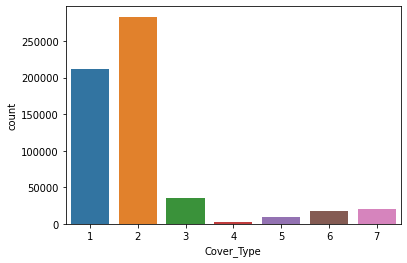

In [ ]:
sns.countplot(x=data['Cover_Type'])

In [ ]:
data.corr()

In [ ]:
data['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [ ]:
data['Cover_Type']=data['Cover_Type'].astype('category')

In [ ]:
correlation = data.corr()
correlation

In [ ]:
NUM_CLASSES = 8
batch_size = 64
epochs = 10

In [ ]:
x_train=data.iloc[:,0:-1]
y_train =data.iloc[:,-1:]

In [ ]:
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
# model.add(Dense(NUM_CLASSES, activation='softmax'))
# model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
StdScl = StandardScaler()

In [ ]:
x_train.iloc[:,0:10] = StdScl.fit_transform(x_train.iloc[:,0:10])

In [ ]:
x_train.shape

(581011, 54)

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(54,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation ='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(NUM_CLASSES,activation='softmax'))


In [ ]:
print("Summary report of Keras model:") 
model.summary()

Summary report of Keras model:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               7040      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= "adam", metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_split=0.3 )

Epoch 1/10
6355/6355 [==============================] - 18s 3ms/step - loss: 0.5058 - accuracy: 0.7944 - val_loss: 0.4797 - val_accuracy: 0.7991
Epoch 2/10
6355/6355 [==============================] - 17s 3ms/step - loss: 0.4964 - accuracy: 0.7982 - val_loss: 0.5437 - val_accuracy: 0.7702
Epoch 3/10
6355/6355 [==============================] - 20s 3ms/step - loss: 0.4915 - accuracy: 0.8012 - val_loss: 0.5889 - val_accuracy: 0.7552
Epoch 4/10
6355/6355 [==============================] - 19s 3ms/step - loss: 0.4886 - accuracy: 0.8019 - val_loss: 0.6079 - val_accuracy: 0.7462
Epoch 5/10
6355/6355 [==============================] - 21s 3ms/step - loss: 0.4854 - accuracy: 0.8029 - val_loss: 0.6459 - val_accuracy: 0.7369
Epoch 6/10
6355/6355 [==============================] - 18s 3ms/step - loss: 0.4856 - accuracy: 0.8033 - val_loss: 0.6504 - val_accuracy: 0.7321
Epoch 7/10
6355/6355 [==============================] - 20s 3ms/step - loss: 0.4807 - accuracy: 0.8050 - val_loss: 0.6429 - val_ac

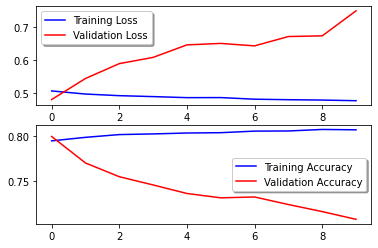

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)